
# Bollinger Bands

Bollinger bands are a type of statistical chart characterizing the prices and volatility over time of a financial instrument or commodity, using a formulaic method propounded by John Bollinger in the 1980s. 

Financial traders employ these charts as a methodical tool to inform trading decisions, control automated trading systems, or as a component of technical analysis. 

Bollinger bands display a graphical band, usually an upper and a lower band.

This is a very simple example of 
- creating a Bollinger band for 2 std deviations above and below the price of oil
- displaying the Bollinger band graphically

In [1]:
import pandas as pd
import numpy as np

## Load in the data

Use the file GOLD.csv into a DataFrame

In [3]:
df = pd.read_excel('FinData.xls', sheet_name='GOOGL', index_col='Date', parse_dates=True)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,52.082081,48.028027,50.050049,50.220219,44659000,50.220219
2004-08-20,54.594593,50.300301,50.555557,54.209209,22834300,54.209209
2004-08-23,56.796795,54.579578,55.430431,54.754753,18256100,54.754753
2004-08-24,55.855854,51.836838,55.675674,52.487488,15247300,52.487488
2004-08-25,54.054054,51.991993,52.532532,53.053055,9188600,53.053055
...,...,...,...,...,...,...
2019-12-19,1357.530029,1348.750000,1351.910034,1356.439941,1446100,1356.439941
2019-12-20,1364.000000,1350.729980,1363.099976,1351.219971,2504500,1351.219971
2019-12-23,1361.849976,1348.000000,1358.729980,1350.630005,996800,1350.630005


## Create a new DataFrame 

We are going to create a new DataFrame with 3 columns.

This DataFrame will be used to store data for the Bollinger band which will be derived from the original data

- **'Price(m avg)'** A monthly rolling average of the 'USD (PM)' column
- **'Upper'** which will be 2 std deviations of the price above **'Price(m avg)'**
- **'Lower'** which will be 2 std deviations of the price below **'Price(m avg)'**

** NOTE ** <br>
- Don't panic if you don't understand the syntax, commands, rolling(30) etc.<BR>
- Understand that this is a very typical analysis that Financial Data Analysts perform on a daily basis.<BR>
- Appreciate that python, pandas, etc. make this type of analysis extremely easy.

In [5]:
# Create an empty DataFrame
# This is a second way to create a DataFrame 
# - the first is to read the data directly from a csv file
# - this method creates an empty DataFrame in memory

df_BOLL = pd.DataFrame()
df_BOLL.head()

# Copy the 'Close' column from the original DataFrame into this DataFrame
df_BOLL['Close'] = df['Close']
df_BOLL.head()
df_BOLL['SMA(Close)'] = df_BOLL['Close'].rolling(21).mean()
df_BOLL['Upper'] = df_BOLL['SMA(Close)'] + 2 * df_BOLL['Close'].rolling(21).std()
df_BOLL['Lower'] = df_BOLL['SMA(Close)'] - 2 * df_BOLL['Close'].rolling(21).std()
df_BOLL

,Close,SMA(Close),Upper,Lower
Date,,,,
2004-08-19,50.220219,NaN,NaN,NaN
2004-08-20,54.209209,NaN,NaN,NaN
2004-08-23,54.754753,NaN,NaN,NaN
2004-08-24,52.487488,NaN,NaN,NaN
2004-08-25,53.053055,NaN,NaN,NaN
...,...,...,...,...
2019-12-19,1356.439941,1326.135707,1374.351663,1277.919752
2019-12-20,1351.219971,1328.486183,1376.544027,1280.428338
2019-12-23,1350.630005,1330.890468,1378.035422,1283.745514


<AxesSubplot:xlabel='Date'>

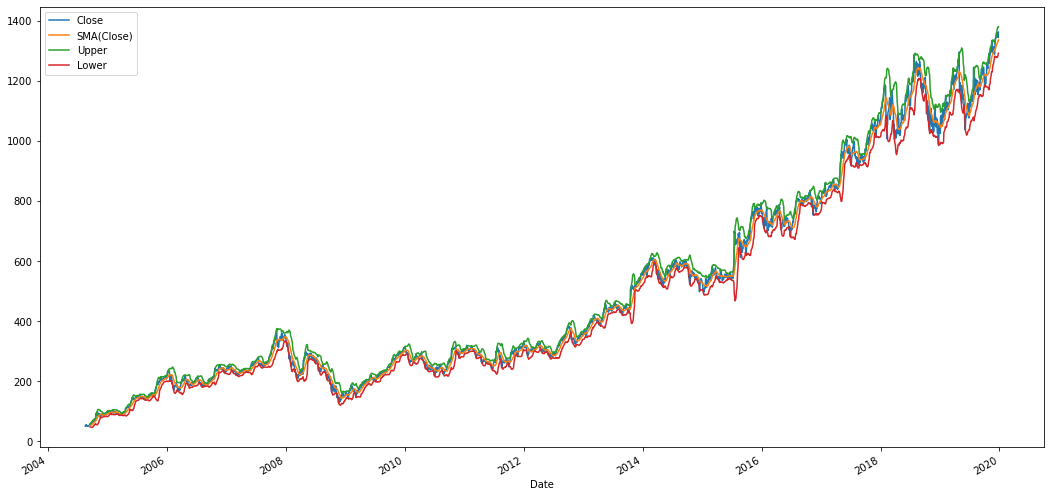

In [7]:
df_BOLL.plot(figsize=(18,9))

<AxesSubplot:xlabel='Date'>

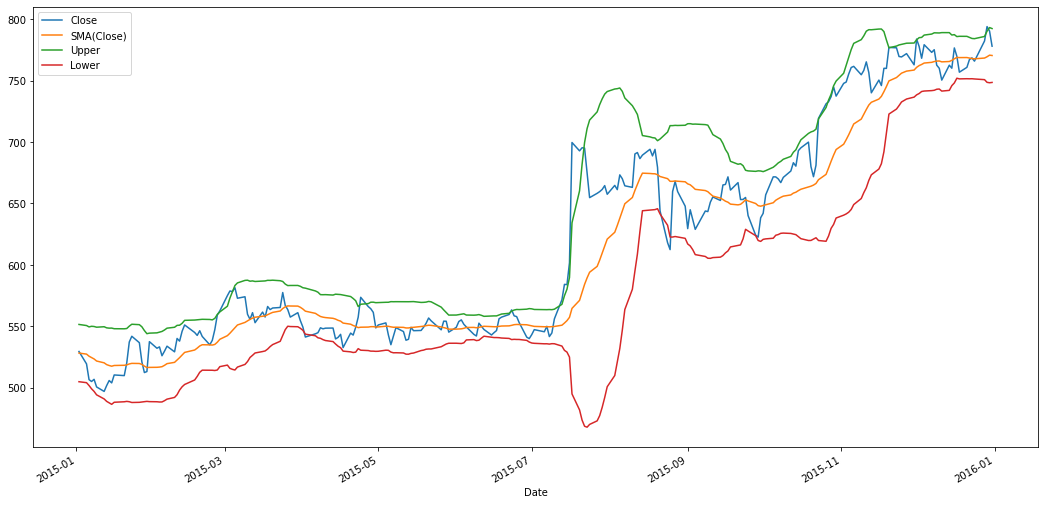

In [10]:
df_BOLL['2015'].plot(figsize=(18,9))